In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from google.colab import drive
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso



*  The pandas library will be used to manipulate and encode and standardize the dataset
*   sklearn is a machine learning library for the doing the regression
*   The numpy library will be used to convert the dataset into vectors





# Get the Dataset

In [3]:
drive.mount("/drive")
data = pd.read_csv("/drive/MyDrive/housing_pricing.csv")
"""data = pd.read_csv('/content/housing_data.csv')"""



Mounted at /drive


"data = pd.read_csv('/content/housing_data.csv')"

In [4]:
data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000


In [5]:
data.shape

(1460, 77)

The above line analyzes the shape of the dataset. The datasets comprises of 77 columns and 1460 rows. 

# Preparing the dataset

*   Checking for missing values
*   Also,preparing the dataset will consist of filling in missing values
*   Dropping irrelevant features/columns
*   Encoding the dataset so that all values are expressed in the form of numbers





In [6]:
data.drop('Id',inplace=True,axis=1)

We drop the 'Id' Column given that it is not relevant to our dataset given the task at hand. The zero axis is for index while axis 1 is for the 'Id' column. Inplace=True specifies that we want to preserve the remaining data as it is.  

In [7]:
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


In [8]:
data.shape

(1460, 76)

In [9]:
original_features=list(data.columns)
len(original_features)

76

The following line search for missing values. It checks each feature for missing values. So the features with missing values are bound in the 'features_missing_values' list 

In [10]:
features_missing_values=list(data.columns[data.isna().any()])
len(features_missing_values)

15

In [11]:
len(data)

1460

# Fill in Missing Features

We are going to fill the missing values using the bfill (backward fill) and mean_fill (for the numerical values) strategies.

In [12]:
bfill,mean_fill=[],[]

The filling strategy proceeds as follows:
If a feature has more than a certain percentage of values that are missing then we fill this feature.

In [13]:
for feature in features_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [14]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [15]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [16]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [17]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [18]:
data['FireplaceQu'].isna().sum()

2

In [19]:
data['FireplaceQu'].fillna(method='ffill',inplace=True)

In [20]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


# Encode the Dataset

In [21]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [22]:
numerical=list(set(original_features)-set(categorical_features))
numerical

['PoolArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MSSubClass',
 'BsmtFinSF1',
 'LotFrontage',
 'GarageArea',
 'MasVnrArea',
 'BsmtFinSF2',
 'Fireplaces',
 '2ndFlrSF',
 'BedroomAbvGr',
 'OpenPorchSF',
 'ScreenPorch',
 'LowQualFinSF',
 'OverallCond',
 'YearBuilt',
 'OverallQual',
 'FullBath',
 'SalePrice',
 'BsmtFullBath',
 'MoSold',
 'GarageYrBlt',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 '3SsnPorch',
 'YearRemodAdd',
 'KitchenAbvGr',
 'EnclosedPorch',
 'GrLivArea',
 'WoodDeckSF',
 'MiscVal',
 'GarageCars',
 'LotArea',
 'YrSold',
 'HalfBath',
 'BsmtUnfSF']

In [23]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
nominal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(nominal))

In [25]:
target=['SalePrice']

In [26]:
df_nominal=pd.get_dummies(data[nominal])

In [27]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal]

In [28]:
data[numerical]

,PoolArea,TotalBsmtSF,1stFlrSF,MSSubClass,BsmtFinSF1,LotFrontage,GarageArea,MasVnrArea,BsmtFinSF2,Fireplaces,2ndFlrSF,BedroomAbvGr,OpenPorchSF,ScreenPorch,LowQualFinSF,OverallCond,YearBuilt,OverallQual,FullBath,SalePrice,BsmtFullBath,MoSold,GarageYrBlt,BsmtHalfBath,TotRmsAbvGrd,3SsnPorch,YearRemodAdd,KitchenAbvGr,EnclosedPorch,GrLivArea,WoodDeckSF,MiscVal,GarageCars,LotArea,YrSold,HalfBath,BsmtUnfSF
0,0,856,856,60,706,65.0,548,196.0,0,0,854,3,61,0,0,5,2003,7,2,208500,1,2,2003.0,0,8,0,2003,1,0,1710,0,0,2,8450,2008,1,150
1,0,1262,1262,20,978,80.0,460,0.0,0,1,0,3,0,0,0,8,1976,6,2,181500,0,5,1976.0,1,6,0,1976,1,0,1262,298,0,2,9600,2007,0,284
2,0,920,920,60,486,68.0,608,162.0,0,1,866,3,42,0,0,5,2001,7,2,223500,1,9,2001.0,0,6,0,2002,1,0,1786,0,0,2,11250,2008,1,434
3,0,756,961,70,216,60.0,642,0.0,0,1,756,3,35,0,0,5,1915,7,1,140000,1,2,1998.0,0,7,0,1970,1,272,1717,0,0,3,9550,2006,0,540
4,0,1145,1145,60,655,84.0,836,350.0,0,1,1053,4,84,0,0,5,2000,8,2,250000,1,12,2000.0,0,9,0,2000,1,0,2198,192,0,3,14260,2008,1,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,953,953,60,0,62.0,460,0.0,0,1,694,3,40,0,0,5,1999,6,2,175000,0,8,1999.0,0,7,0,2000,1,0,1647,0,0,2,7917,2007,1,953
1456,0,1542,2073,20,790,85.0,500,119.0,163,2,0,3,0,0,0,6,1978,6,2,210000,1,2,1978.0,0,7,0,1988,1,0,2073,349,0,2,13175,2010,0,589
1457,0,1152,1188,70,275,66.0,252,0.0,0,2,1152,4,60,0,0,9,1941,7,2,266500,0,5,1941.0,0,9,0,2006,1,0,2340,0,2500,1,9042,2010,0,877
1458,0,1078,1078,20,49,68.0,240,0.0,1029,0,0,2,0,0,0,6,1950,5,1,142125,1,4,1950.0,0,5,0,1996,1,112,1078,366,0,1,9717,2010,0,0


In [29]:
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [30]:
new_data.shape

(1460, 107)

The following line put the target feature at the end of the new_data dataframe

In [31]:
df1 = new_data.pop('SalePrice') # remove column 'SalePrice' and store it in df1
new_data['SalePrice']=df1 # add 'SalePrice' series as a 'new' column.
new_data.shape

(1460, 107)

# Standardize 

This section is used for DATA NORMALIZATION (STANDARDIZATION)

In [32]:
new_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [33]:
X=new_data.drop('SalePrice',axis=1)

In [34]:
y=data[target]

In [35]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [36]:
X=X.to_numpy()
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.008e+03, 1.000e+00,
        1.500e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.007e+03, 0.000e+00,
        2.840e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.008e+03, 1.000e+00,
        4.340e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.010e+03, 0.000e+00,
        8.770e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.010e+03, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.008e+03, 1.000e+00,
        1.360e+02]])

In [37]:
y=y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [38]:
X.shape

(1460, 106)

In [39]:
y.shape

(1460, 1)

In [40]:
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)

In [41]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])





# Feature Selection Using Lassocv

*   PCA Dimensionality reduction( to filter noisy datasets)
*   Lassocv



In [42]:
from sklearn.decomposition import PCA


In [43]:
pca=PCA(n_components=2)
p_components=pca.fit_transform(X)

In [44]:
p_components

array([[ 2.44330781, -1.27755678],
       [ 0.31646062,  2.63897139],
       [ 2.85721917, -0.81016766],
       ...,
       [ 1.26182813, -0.86007408],
       [-2.85096295,  3.29513908],
       [-0.77738347,  2.78982048]])

In [45]:
pca.explained_variance_ratio_

array([0.10560233, 0.04472091])

In [46]:
pca_var=PCA(0.9)
new_pcas=pca_var.fit_transform(X)
pca_var.n_components_

68

In [47]:
pca_data=pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data=pd.DataFrame(y,columns=['SalePrice'])
final_data=pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.443308,-1.277557,0.347273
1,0.316461,2.638971,0.007288
2,2.857219,-0.810168,0.536154
3,-1.333151,0.427932,-0.515281
4,5.220984,-0.248763,0.869843
...,...,...,...
1455,1.335075,-2.289019,-0.074560
1456,1.112793,3.255953,0.366161
1457,1.261828,-0.860074,1.077611
1458,-2.850963,3.295139,-0.488523


Now Let's Use Lasso

In [48]:
regressor=LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [49]:
regressor.coef_

array([-1.95909732e-02,  4.20107143e-03, -0.00000000e+00,  0.00000000e+00,
       -4.15509971e-03, -3.51448888e-02,  1.76400624e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.36050954e-03,  1.28330880e-03,  0.00000000e+00,  4.51432590e-02,
       -2.96129237e-02, -4.57561999e-03, -0.00000000e+00,  0.00000000e+00,
       -4.65856520e-03, -1.86135157e-03,  0.00000000e+00, -1.47257062e-02,
        1.04164955e-01,  1.05377853e-01, -2.12233899e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.31643975e-02,  8.01832151e-02,
        0.00000000e+00,  1.59668921e-02,  5.73275718e-04, -0.00000000e+00,
       -1.78651267e-02, -0.00000000e+00, -6.91721193e-03, -9.76933334e-04,
       -1.24140042e-02, -2.15057733e-02,  0.00000000e+00, -0.00000000e+00,
        8.04886073e-04,  3.85715854e-02, -4.22820636e-02, -0.00000000e+00,
        2.77110820e-02, -0.00000000e+00,  9.93890088e-03,  6.05576189e-03,
       -7.82834602e-02, -

In [50]:
regressor.intercept_

2.506535088999592e-16

In [51]:
w1=regressor.coef_[0]
w2=regressor.coef_[1]
b=regressor.intercept_


In [52]:
X

array([[-0.08304548, -0.21585871, -0.10526316, ...,  0.13877749,
         1.22758538, -0.94459061],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.61443862,
        -0.76162067, -0.64122799],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.13877749,
         1.22758538, -0.30164298],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  1.64520971,
        -0.76162067,  0.70126476],
       [-0.08304548, -0.21585871, -0.10526316, ...,  1.64520971,
        -0.76162067, -1.28417562],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.13877749,
         1.22758538, -0.97628521]])

In [53]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# Training the regression model using Deep Feed Forward ANN

In [54]:
# Let's separate the training dataset and the target variable
feature = new_data.iloc[:,0:106] #  training variables
target = new_data.iloc[:,106] # target variable
print(feature.head())
print('\n',target.head())

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  ...  YrSold  HalfBath  BsmtUnfSF
0                 0            0            0  ...    2008         1        150
1                 0            0            0  ...    2007         0        284
2                 0            0            0  ...    2008         1        434
3                 0            0            0  ...    2006         0        540
4                 0            0            0  ...    2008         1        490

[5 rows x 106 columns]

 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Now, let's construct a multi-layer perception architecture which is then going to be used for to predict the house price

In [55]:
# shuffle and split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(feature, target.values, 
                                                    test_size=0.3, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (1022, 106)
testing data shape:  (438, 106)


Now let's build the MLP Network

In [56]:
#let's get the number of columns in the training set
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               16050     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 106,801
Trainable params: 106,801
Non-trainable params: 0
__________________________________________________

Now let's train the model and perform a validation test

In [57]:
X_train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive,Electrical,GarageFinish,Heating,Utilities,HouseStyle,...,LotConfig,LotShape,Foundation,BsmtQual,PoolArea,TotalBsmtSF,1stFlrSF,MSSubClass,BsmtFinSF1,LotFrontage,GarageArea,MasVnrArea,BsmtFinSF2,Fireplaces,2ndFlrSF,BedroomAbvGr,OpenPorchSF,ScreenPorch,LowQualFinSF,OverallCond,YearBuilt,OverallQual,FullBath,BsmtFullBath,MoSold,GarageYrBlt,BsmtHalfBath,TotRmsAbvGrd,3SsnPorch,YearRemodAdd,KitchenAbvGr,EnclosedPorch,GrLivArea,WoodDeckSF,MiscVal,GarageCars,LotArea,YrSold,HalfBath,BsmtUnfSF
135,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4,2,1,0,2,...,4,3,2,3,0,1304,1682,20,0,80.0,530,288.0,0,1,0,3,0,0,0,6,1970,7,2,0,5,1970.0,0,7,0,1970,1,0,1682,98,0,2,10400,2008,0,1304
1452,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,1,0,7,...,4,3,2,2,0,547,1072,180,547,35.0,525,80.0,0,0,0,2,28,0,0,5,2005,5,1,1,5,2005.0,0,5,0,2005,1,0,1072,0,0,2,3675,2006,0,0
762,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,4,2,1,0,5,...,4,3,2,2,0,756,764,60,24,72.0,614,0.0,0,0,783,3,45,0,0,5,2009,7,2,0,6,2009.0,0,7,0,2009,1,0,1547,169,0,2,8640,2010,1,732
932,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,4,0,1,0,2,...,0,0,2,0,0,1905,1905,20,0,84.0,788,302.0,0,1,0,3,191,0,0,5,2006,9,2,0,3,2006.0,0,8,0,2006,1,0,1905,0,0,3,11670,2007,0,1905
435,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,1,0,5,...,1,1,2,2,0,799,827,60,385,43.0,550,0.0,344,1,834,3,61,0,0,6,1996,7,2,1,4,1996.0,0,6,0,1996,1,0,1661,158,0,2,10667,2009,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,1,0,2,...,4,0,2,2,0,1314,1314,20,24,78.0,440,0.0,0,1,0,3,22,0,0,5,2006,6,2,0,3,2006.0,0,6,0,2006,1,0,1314,0,0,2,9317,2007,0,1290
1130,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,4,2,1,0,0,...,4,3,0,3,0,1122,1328,50,622,65.0,576,0.0,0,2,653,4,44,0,0,3,1928,4,2,1,12,1981.0,0,7,0,1950,1,0,1981,431,0,2,7804,2009,0,500
1294,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,0,2,...,4,3,1,3,0,864,864,20,167,60.0,572,0.0,0,0,0,2,0,0,0,7,1955,5,1,1,4,1957.0,0,5,0,1990,1,0,864,0,0,2,8172,2006,0,697
860,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,2,1,0,0,...,0,3,0,3,0,912,912,50,0,55.0,216,0.0,0,1,514,3,240,0,0,8,1918,7,1,0,6,1925.0,0,7,0,1998,1,0,1426,0,0,1,7642,2007,1,912


In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=15) # this means that it stops training when it doesn't show improvemnet.
X_train = np.asarray(X_train).astype(np.float32)
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
26/26 [==============================] - 1s 11ms/step - loss: 29570123776.0000 - mae: 149688.4375 - val_loss: 8702467072.0000 - val_mae: 71741.2500
Epoch 2/300
26/26 [==============================] - 0s 5ms/step - loss: 11895219200.0000 - mae: 60825.6016 - val_loss: 5093718016.0000 - val_mae: 49903.9922
Epoch 3/300
26/26 [==============================] - 0s 4ms/step - loss: 5916220416.0000 - mae: 48276.1758 - val_loss: 4320054784.0000 - val_mae: 44687.6797
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 4157579520.0000 - mae: 45443.8438 - val_loss: 2979876096.0000 - val_mae: 37613.6406
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 3556649216.0000 - mae: 41947.3164 - val_loss: 2604204032.0000 - val_mae: 36527.8789
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 3235843328.0000 - mae: 39875.3008 - val_loss: 2358789376.0000 - val_mae: 33442.0273
Epoch 7/300
26/26 [==============================] - 0

Let's show the graph of model loss in trainig and validation

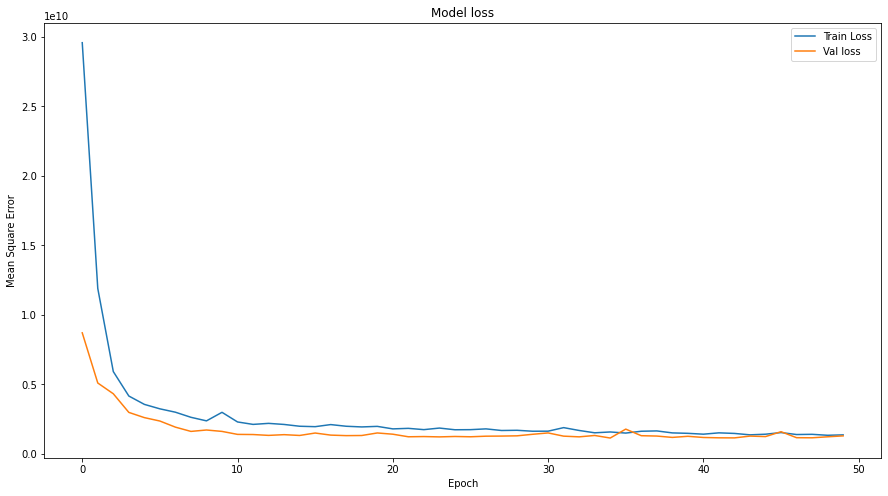

In [59]:
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

# Testing the model

Let's check the model performace in test dataset

In [60]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

14/14 [==============================] - 0s 2ms/step - loss: 1303262464.0000 - mae: 23952.5234
loss value:  1303262464.0
Mean absolute error:  23952.5234375


Predicting the house price

In [61]:
# let's predict the house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


[133870.52  380525.34  111847.23  167567.56  312605.16   72450.69
 192068.95  150789.03   69409.01  163206.77  134525.44  112839.68
 178694.75  187143.7   176770.1   123591.664 178611.89  131589.2
 107782.71  229233.7   169496.89  184796.23  172034.86  117623.484
 206541.33  153063.86  159340.66  140618.05  172796.25  194009.12
 136203.4   307285.66  234243.38  116127.83  254873.08  162905.55
 153510.27  188561.22  361720.03   98405.95  122109.44  221508.83
 117840.79  409447.8   148876.95  181982.8   110155.8   129784.94
 437971.7   161672.83  116292.76  292419.47  105024.7   293351.88
 140798.69  295395.56  168912.39  168095.05  154738.45   87296.69
  76964.52  142405.61  304902.    208399.22  238915.08  200964.03
 115420.44  332365.47  105968.125 162478.34  100690.87  126344.47
 118189.34   90674.805 499287.03  200206.8   366331.1   362690.88
 126712.266 119421.01  109107.59  118621.08  157524.64   82335.68
 155522.42  136306.53  276581.    232190.62  139487.8   158253.12
 207778.58

In [62]:
#Let's show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,154500,133870.515625
1,325000,380525.343750
2,115000,111847.226562
3,159000,167567.562500
4,315500,312605.156250
5,75500,72450.687500
6,311500,192068.953125
7,146000,150789.031250
8,84500,69409.007812
9,135500,163206.765625


Let's visialize the true value with predicted value (using line graph)

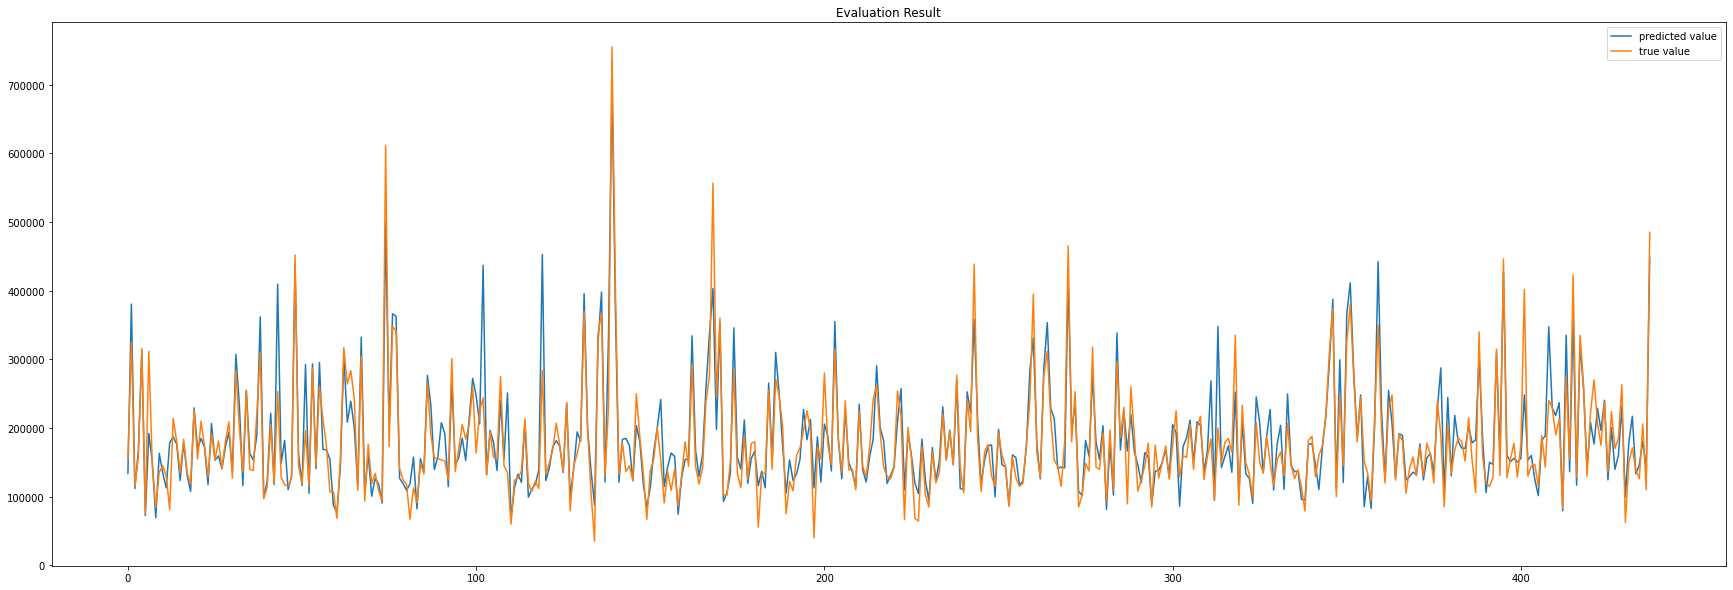

In [63]:
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

Visualize the model evaluation skill

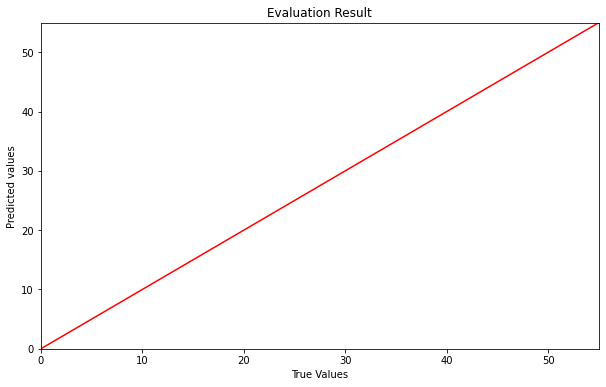

In [64]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()